In [18]:
import torch

Q = torch.tensor([[0.0, 0.0, 0.0], [1, 1, 1], [0.2, 0.2, 0.2], [0.3, 0.3, 0.3]])
K = torch.tensor([[0.1, 0.1, 0.1], [0.2, 0.2, 0.2], [0.3, 0.3, 0.3], [0.4, 0.4, 0.4]])
V = torch.tensor([[[1., 0., 0.], [0., 1., 0.], [0., 0., 1.], [0., 1., 1.]]])

In [8]:
scores = torch.matmul(Q, K.transpose(0, 1))
print(scores)


tensor([[0.0000, 0.0000, 0.0000, 0.0000],
        [0.3000, 0.6000, 0.9000, 1.2000],
        [0.0600, 0.1200, 0.1800, 0.2400],
        [0.0900, 0.1800, 0.2700, 0.3600]])


In [27]:
# Aplicamos la máscara
# Usa la máscara para hacer que los valores de las posiciones que no queremos que se tengan en cuenta sean -infinito, de manera que al aplicar la softmax, estos valores se conviertan en 0, y no les damos importancia.

mask = torch.tensor([[1, 0, 0, 0], [1, 1, 0, 0], [1, 1, 1, 0], [1, 1, 1, 1]])
masked_scores = scores.masked_fill(mask == 0, float('-inf'))
print(masked_scores)

tensor([[0.0000,   -inf,   -inf,   -inf],
        [0.3000, 0.6000,   -inf,   -inf],
        [0.0600, 0.1200, 0.1800,   -inf],
        [0.0900, 0.1800, 0.2700, 0.3600]])


In [54]:
import math

# Dividimos por la raíz cuadrada de la dimensión de la matriz K
sqrt_dk = math.sqrt(K.size(-1))
scaled_scores = masked_scores / sqrt_dk
print(scaled_scores)

tensor([[0.0000,   -inf,   -inf,   -inf],
        [0.1732, 0.3464,   -inf,   -inf],
        [0.0346, 0.0693, 0.1039,   -inf],
        [0.0520, 0.1039, 0.1559, 0.2078]])


In [55]:
# Aplicamos la softmax
attention = torch.nn.functional.softmax(scaled_scores, dim=-1)
print(attention)

tensor([[1.0000, 0.0000, 0.0000, 0.0000],
        [0.4568, 0.5432, 0.0000, 0.0000],
        [0.3219, 0.3332, 0.3449, 0.0000],
        [0.2309, 0.2432, 0.2561, 0.2698]])


In [56]:
# Multiplicamos por la matriz V
Z = torch.matmul(attention, V)
print(Z)

tensor([[[1.0000, 0.0000, 0.0000],
         [0.4568, 0.5432, 0.0000],
         [0.3219, 0.3332, 0.3449],
         [0.2309, 0.5130, 0.5260]]])


### Solución: 
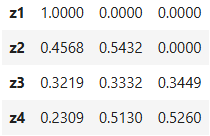